In [ ]:
!pip install matplotlib-venn

In [ ]:
!pip install lazypredict

In [ ]:
#Importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
# Instead of importing plot_confusion_matrix, import ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay
from lazypredict.Supervised import LazyClassifier
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
#Leer Dataset
df = pd.read_csv('default of credit card clients.csv')
df.shape

(30000, 25)

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [ ]:
#Ver las medidas estadisticas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.00,15000.50,8660.40,1.00,7500.75,15000.50,22500.25,30000.00
LIMIT_BAL,30000.00,167484.32,129747.66,10000.00,50000.00,140000.00,240000.00,1000000.00
SEX,30000.00,1.60,0.49,1.00,1.00,2.00,2.00,2.00
EDUCATION,30000.00,1.85,0.79,0.00,1.00,2.00,2.00,6.00
MARRIAGE,30000.00,1.55,0.52,0.00,1.00,2.00,2.00,3.00
AGE,30000.00,35.49,9.22,21.00,28.00,34.00,41.00,79.00
PAY_0,30000.00,-0.02,1.12,-2.00,-1.00,0.00,0.00,8.00
PAY_2,30000.00,-0.13,1.20,-2.00,-1.00,0.00,0.00,8.00
PAY_3,30000.00,-0.17,1.20,-2.00,-1.00,0.00,0.00,8.00
PAY_4,30000.00,-0.22,1.17,-2.00,-1.00,0.00,0.00,8.00


In [ ]:
#Ver nulos
df.isnull().sum()

,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


In [ ]:
#Valores duplicados
df.duplicated().sum()

0

In [ ]:
#Unicos
df.nunique()

,0
ID,30000
LIMIT_BAL,81
SEX,2
EDUCATION,7
MARRIAGE,4
AGE,56
PAY_0,11
PAY_2,11
PAY_3,11
PAY_4,11


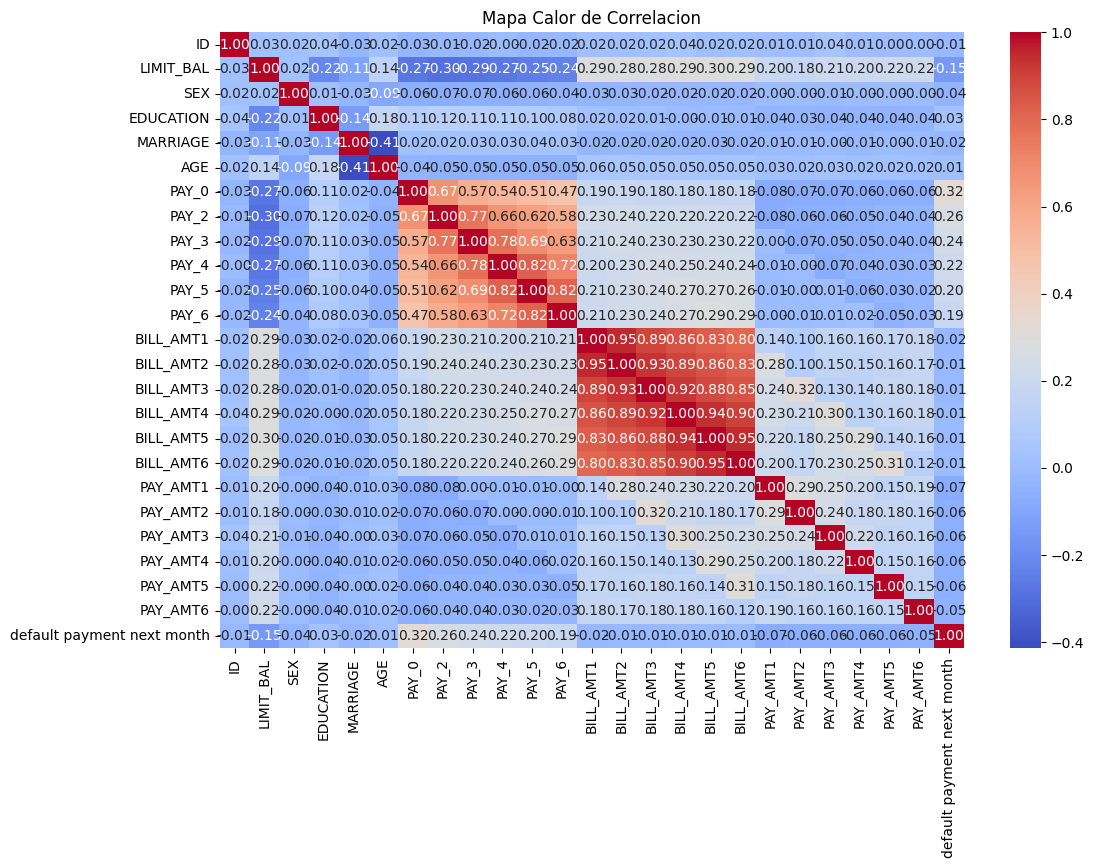

In [ ]:
#Mapa de calor
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Mapa Calor de Correlacion")
plt.show()

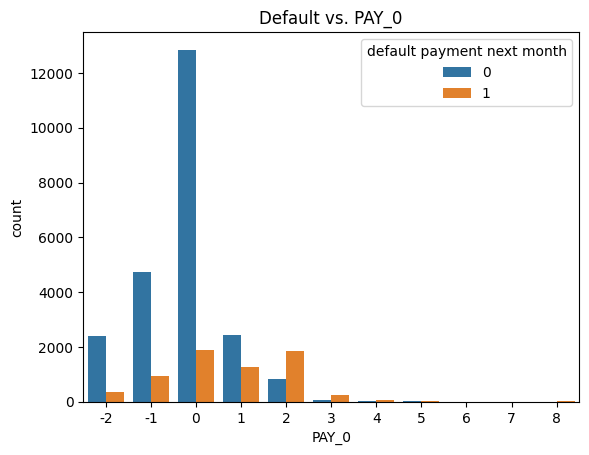

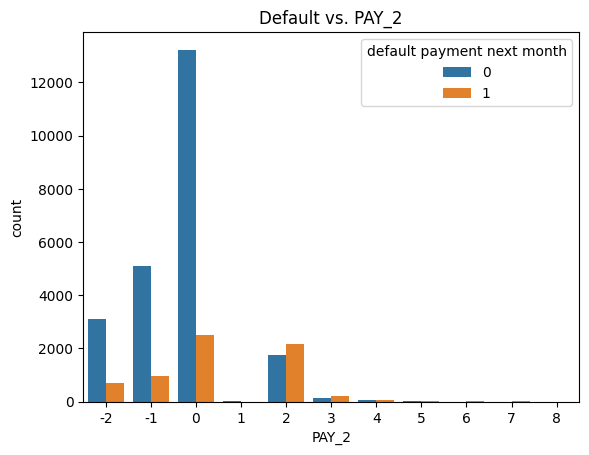

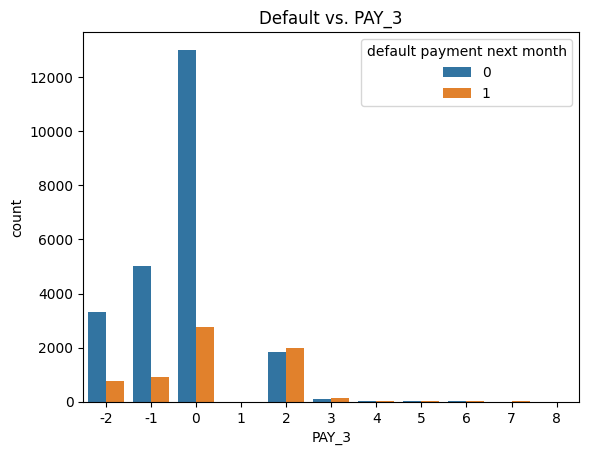

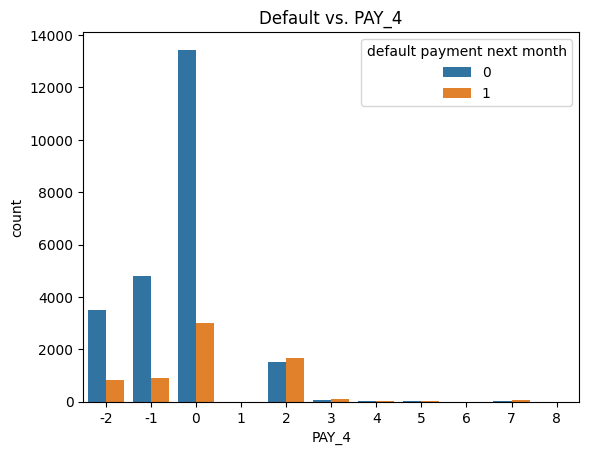

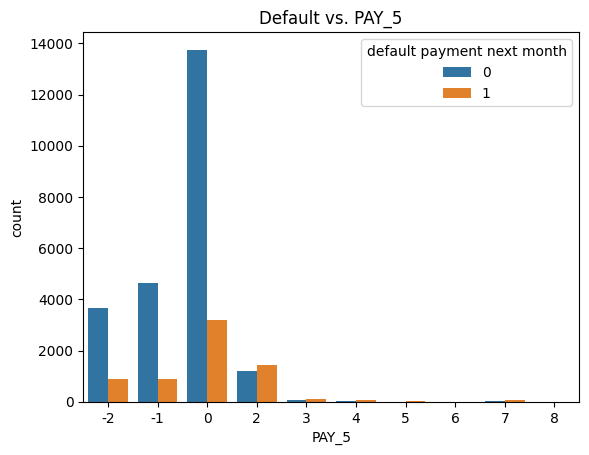

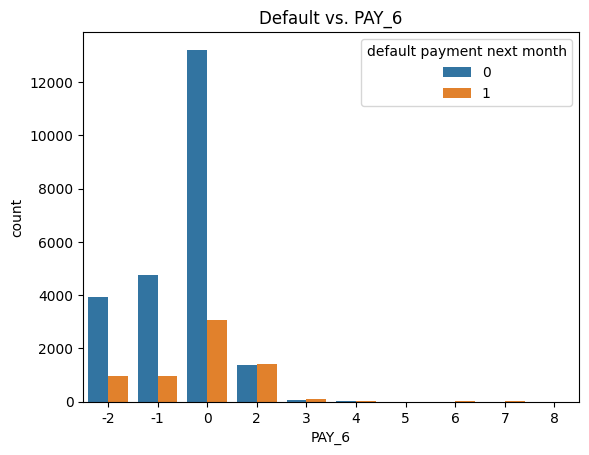

In [ ]:
payment_history_columns = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

for col in payment_history_columns:
    sns.countplot(x=col, hue='default payment next month', data=df)
    plt.title(f'Default vs. {col}')
    plt.show()

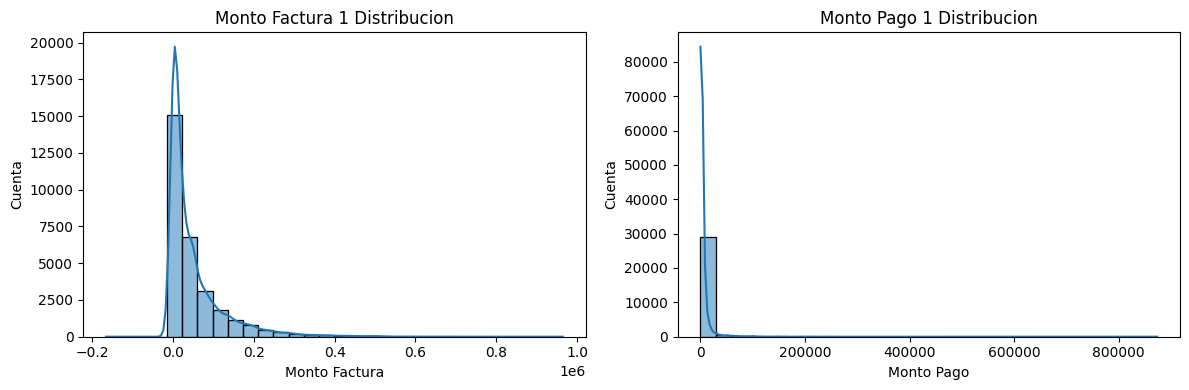

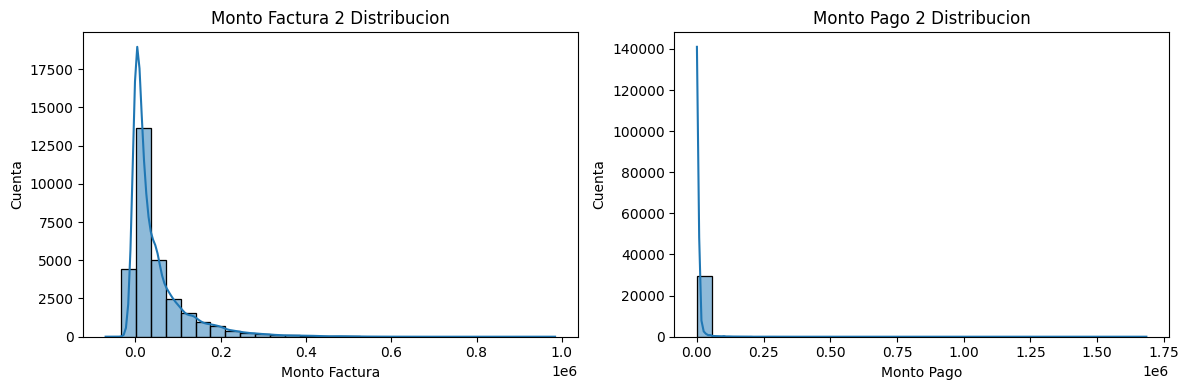

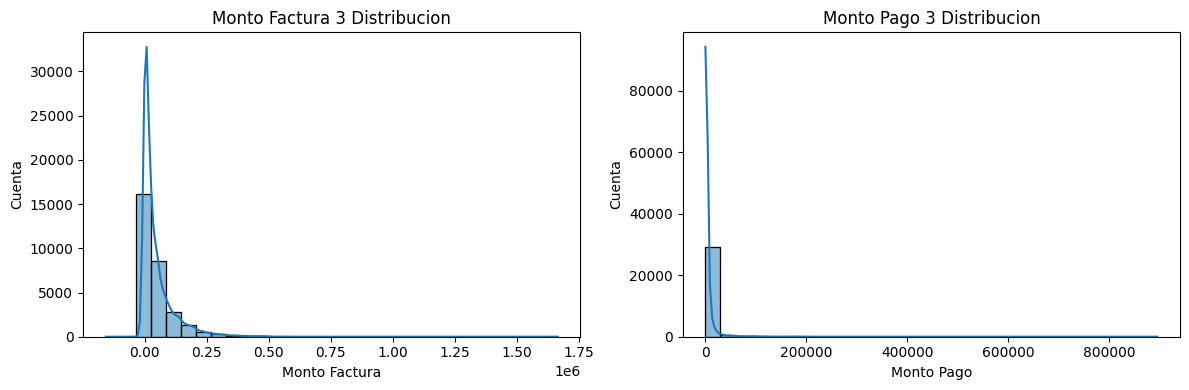

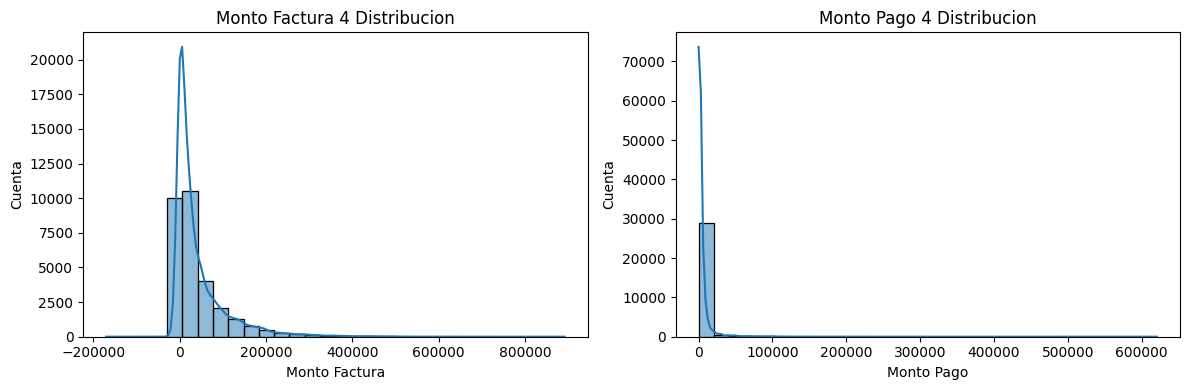

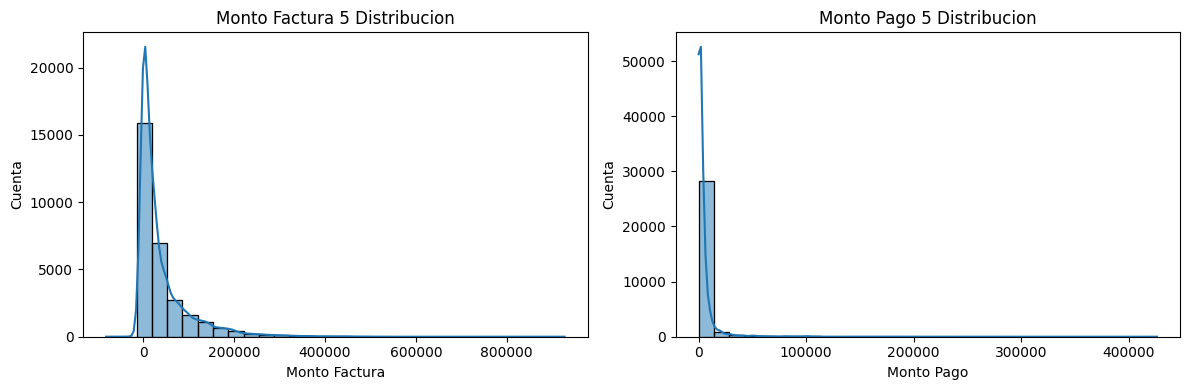

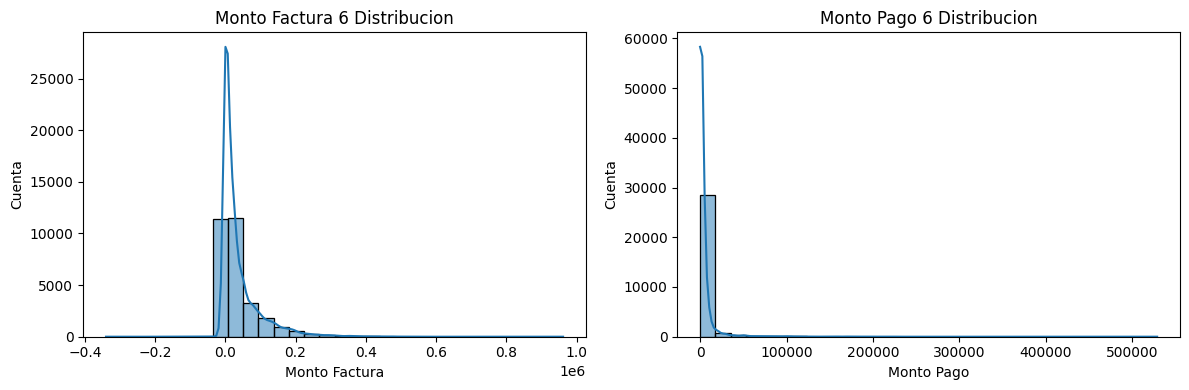

In [ ]:
for i in range(1, 7):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.histplot(df[f'BILL_AMT{i}'], bins=30, kde=True)
    plt.title(f'Monto Factura {i} Distribucion')
    plt.xlabel('Monto Factura')
    plt.ylabel('Cuenta')

    plt.subplot(1, 2, 2)
    sns.histplot(df[f'PAY_AMT{i}'], bins=30, kde=True)
    plt.title(f'Monto Pago {i} Distribucion')
    plt.xlabel('Monto Pago')
    plt.ylabel('Cuenta')

    plt.tight_layout()
    plt.show()

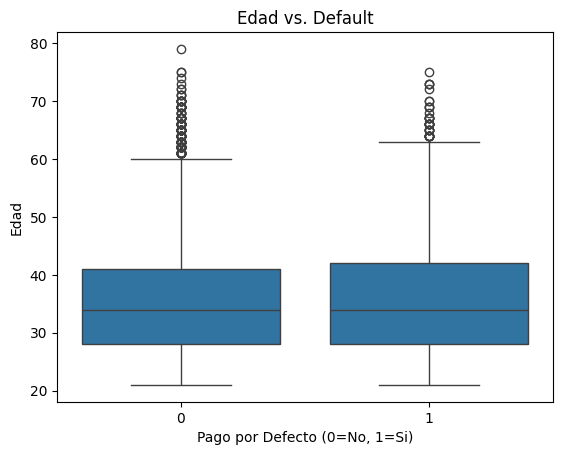

In [ ]:
sns.boxplot(x='default payment next month', y='AGE', data=df)
plt.title('Edad vs. Default')
plt.xlabel('Pago por Defecto (0=No, 1=Si)')
plt.ylabel('Edad')
plt.show()

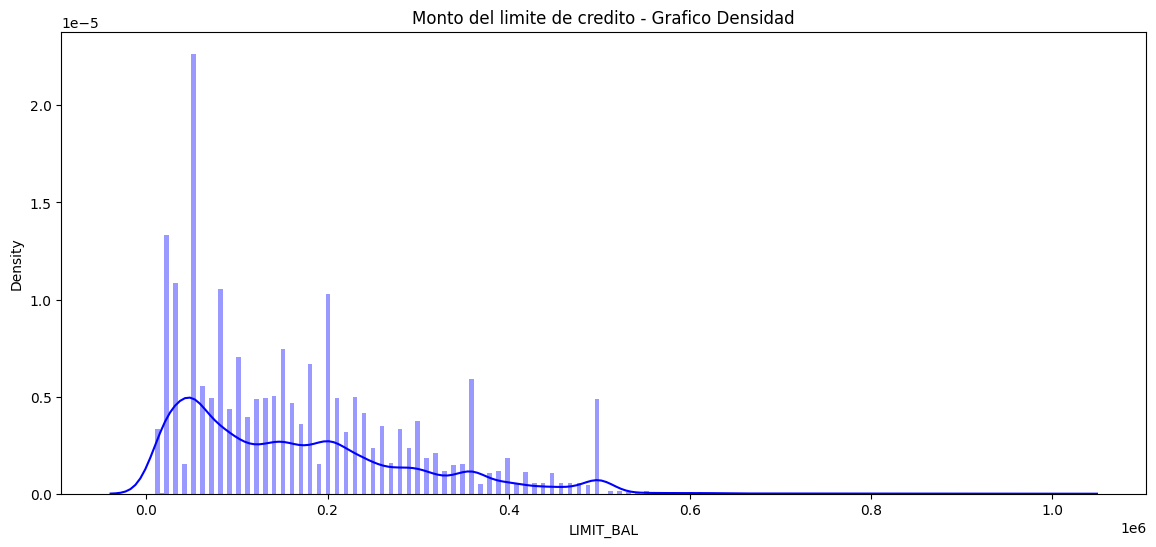

In [ ]:
#Grafico de densidad
plt.figure(figsize = (14,6))
plt.title('Monto del limite de credito - Grafico Densidad')
sns.set_color_codes("pastel")
sns.distplot(df['LIMIT_BAL'],kde=True,bins=200, color="blue")
plt.show()

In [ ]:
df['LIMIT_BAL'].value_counts().head(5)

,count
LIMIT_BAL,
50000,3365
20000,1976
30000,1610
80000,1567
200000,1528


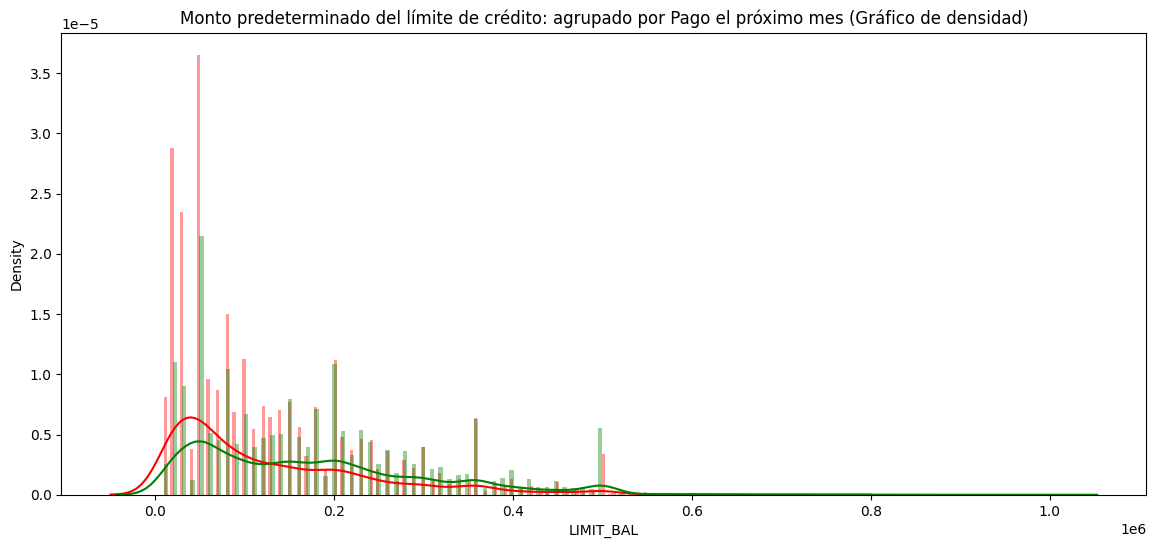

In [ ]:
class_0 = df.loc[df['default payment next month'] == 0]["LIMIT_BAL"]
class_1 = df.loc[df['default payment next month'] == 1]["LIMIT_BAL"]
plt.figure(figsize = (14,6))
plt.title('Monto predeterminado del límite de crédito: agrupado por Pago el próximo mes (Gráfico de densidad)')
sns.set_color_codes("pastel")
sns.distplot(class_1,kde=True,bins=200, color="red")
sns.distplot(class_0,kde=True,bins=200, color="green")
plt.show()

In [ ]:
#dropear columnas innecesarias
df = df.drop('ID', axis = 'columns')

In [ ]:
df.sample()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
8091,290000,2,1,1,35,1,-2,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0


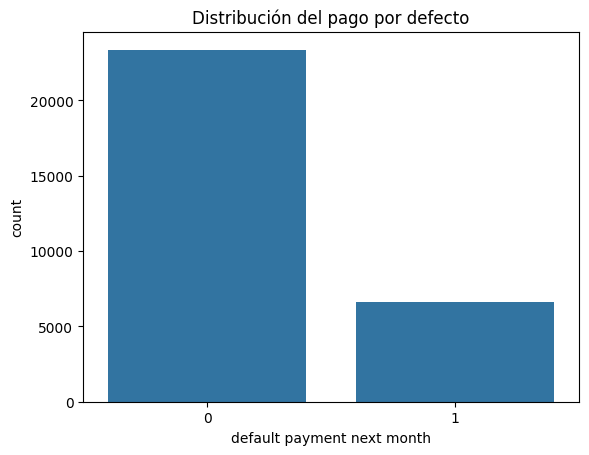

In [ ]:
#Comprobar la distribución de la variable objetivo
sns.countplot(x='default payment next month', data=df)
plt.title('Distribución del pago por defecto')
plt.show()

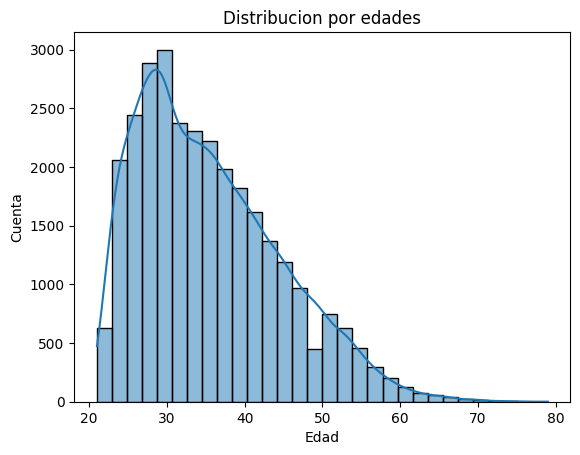

In [ ]:
#Explorar la distribución de las caracteristicas, p.e., edad
sns.histplot(df['AGE'], bins=30, kde=True)
plt.title('Distribucion por edades')
plt.xlabel('Edad')
plt.ylabel('Cuenta')
plt.show()

<Axes: >

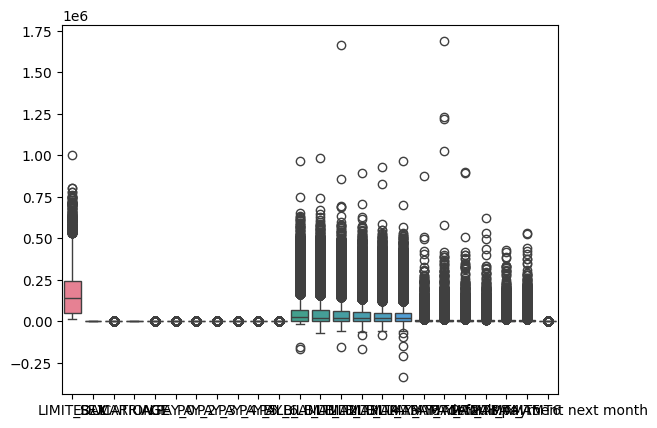

In [ ]:
#Diagrama de caja para comprobar los valores atípicos
sns.boxplot(data=df)

In [ ]:
#Caracteristicas separadas y variable de destino
X = df.drop('default payment next month', axis=1)
y = df['default payment next month']

#Dividir los datos en conjuntos de entrenamientoy de pruebas
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Estandarizar las características numéricas
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(24000, 23)
(6000, 23)
(24000,)
(6000,)


In [ ]:
# Creacion de modelo de regresión logística
model = LogisticRegression()

#Entrenar el modelko
model.fit(X_train_scaled, y_train)

# Hacer predicciones
y_pred = model.predict(X_test_scaled)

#Evakuación del modelo
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(report)

Accuracy: 0.81
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4687
           1       0.69      0.24      0.35      1313

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000



In [ ]:
#Comprobar la importancia de las características
feature_importance = pd.Series(model.coef_[0], index=X.columns)
feature_importance = feature_importance.abs().sort_values(ascending=False)
print("Feature Importance:")
print(feature_importance)

Feature Importance:
PAY_0       0.65
BILL_AMT1   0.36
PAY_AMT2    0.25
PAY_AMT1    0.17
BILL_AMT2   0.13
BILL_AMT3   0.12
PAY_2       0.11
LIMIT_BAL   0.11
MARRIAGE    0.08
EDUCATION   0.08
PAY_3       0.08
AGE         0.08
BILL_AMT4   0.06
SEX         0.06
PAY_AMT4    0.06
PAY_4       0.05
PAY_AMT6    0.05
BILL_AMT5   0.03
BILL_AMT6   0.03
PAY_AMT3    0.02
PAY_AMT5    0.02
PAY_5       0.02
PAY_6       0.01
dtype: float64


In [ ]:
from lazypredict.Supervised import LazyClassifier
cla = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = cla.fit(X_train, X_test, y_train, y_test)

100%|██████████| 32/32 [01:40<00:00,  3.13s/it]

[LightGBM] [Info] Number of positive: 5323, number of negative: 18677
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001597 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3272
[LightGBM] [Info] Number of data points in the train set: 24000, number of used features: 23
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.221792 -> initscore=-1.255256
[LightGBM] [Info] Start training from score -1.255256


In [ ]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
GaussianNB,0.71,0.69,0.69,0.73,0.04
XGBClassifier,0.82,0.66,0.66,0.80,0.66
LGBMClassifier,0.82,0.66,0.66,0.80,0.26
SGDClassifier,0.81,0.65,0.65,0.79,0.22
RandomForestClassifier,0.82,0.65,0.65,0.80,8.56
ExtraTreesClassifier,0.81,0.65,0.65,0.79,3.18
NearestCentroid,0.66,0.65,0.65,0.69,0.06
SVC,0.82,0.64,0.64,0.79,27.90
KNeighborsClassifier,0.80,0.64,0.64,0.78,0.43


In [ ]:
import pickle

In [ ]:
pickle.dump(model, open('Modelo_Pred.pkl','wb'))